In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

# 1. 웹에서 주문수를 분석하는 테크닉


## 1.1 데이터 읽어오기

In [2]:
df_customer = pd.read_csv('../data/customer_master.csv')
df_customer.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [3]:
df_customer.shape

(5000, 8)

In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5000 non-null   object
 1   customer_name      5000 non-null   object
 2   registration_date  5000 non-null   object
 3   email              5000 non-null   object
 4   gender             5000 non-null   object
 5   age                5000 non-null   int64 
 6   birth              5000 non-null   object
 7   pref               5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


In [5]:
df_item = pd.read_csv('../data/item_master.csv')
df_item.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [6]:
df_item.shape

(5, 3)

In [7]:
df_trans1 = pd.read_csv('../data/transaction_1.csv')
df_trans1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [8]:
df_trans1.shape

(5000, 4)

In [9]:
df_trans1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  5000 non-null   object
 1   price           5000 non-null   int64 
 2   payment_date    5000 non-null   object
 3   customer_id     5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [10]:
df_transdetail1 = pd.read_csv('../data/transaction_detail_1.csv')
df_transdetail1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [11]:
df_transdetail1.shape

(5000, 4)

In [12]:
df_transdetail1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   detail_id       5000 non-null   int64 
 1   transaction_id  5000 non-null   object
 2   item_id         5000 non-null   object
 3   quantity        5000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 156.4+ KB


## 1.2 데이터 결합(유니언)하기

In [13]:
df_trans2 = pd.read_csv('../data/transaction_2.csv')
df_trans2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [14]:
df_trans2.shape

(1786, 4)

In [15]:
df_transaction = pd.concat([df_trans1, df_trans2], axis=0, ignore_index=True)
df_transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [16]:
print(df_trans1.shape)
print(df_trans2.shape)
print(df_transaction.shape)

(5000, 4)
(1786, 4)
(6786, 4)


In [17]:
df_transdetail2 = pd.read_csv('../data/transaction_detail_2.csv')
df_transdetail2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [18]:
df_transdetail2.shape

(2144, 4)

In [19]:
df_detail = pd.concat([df_transdetail1, df_transdetail2], axis=0, ignore_index=True)
df_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [20]:
df_detail.shape

(7144, 4)

## 1.3 매출 데이터끼리 결합(조인)하기

In [21]:
df_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [22]:
df_transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [23]:
df_transaction.shape

(6786, 4)

In [24]:
df_join = pd.merge(df_detail, df_transaction[['transaction_id', 'payment_date', 'customer_id']], on='transaction_id', how='left')
df_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [25]:
print(df_transaction.shape)
print(df_detail.shape)
print(df_join.shape)

(6786, 4)
(7144, 4)
(7144, 6)


In [26]:
df_join.isnull().sum()

detail_id         0
transaction_id    0
item_id           0
quantity          0
payment_date      0
customer_id       0
dtype: int64

## 1.4 마스터 데이터 결합(조인)하기

In [27]:
df_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [28]:
df_customer.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [29]:
df_join = pd.merge(df_join, df_customer, on='customer_id', how='left')
df_join = pd.merge(df_join, df_item, on='item_id', how='left')
df_join.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


## 1.5 필요한 데이터 컬럼 만들기

In [30]:
df_join['price'] = df_join['quantity'] * df_join['item_price']
df_join[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


## 1.6 데이터 검산하기

In [31]:
print(df_join['price'].sum())
print(df_transaction['price'].sum())

971135000
971135000


In [32]:
df_join['price'].sum() == df_transaction['price'].sum()

True

## 1.7 각종 통계량을 파악하자

In [33]:
df_join.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [34]:
df_join.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


## 1.8 월별로 데이터를 집계해보자

In [35]:
df_join.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

In [36]:
df_join['payment_date'] = pd.to_datetime(df_join['payment_date'])
df_join['payment_month'] = df_join['payment_date'].dt.strftime('%Y%m')
df_join[['payment_date', 'payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [37]:
df_join.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

## 1.9 월별 상품별 데이터를 집계해보자

In [38]:
df_join.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

## 1.10 상품별 매출 추이를 가시화해보자

In [39]:
df_graph = pd.pivot_table(df_join, index='payment_month', columns='item_name', values='price', aggfunc='sum')
df_graph.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


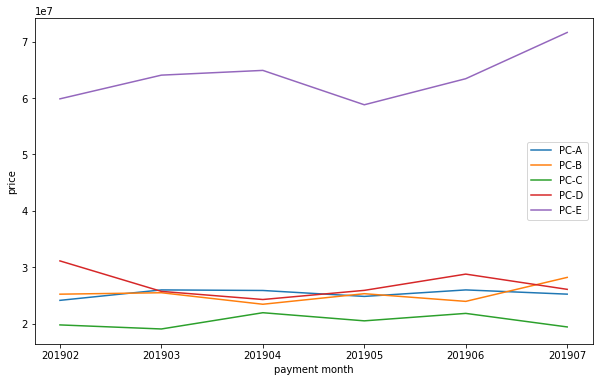

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(list(df_graph.index), df_graph['PC-A'], label='PC-A')
plt.plot(list(df_graph.index), df_graph['PC-B'], label='PC-B')
plt.plot(list(df_graph.index), df_graph['PC-C'], label='PC-C')
plt.plot(list(df_graph.index), df_graph['PC-D'], label='PC-D')
plt.plot(list(df_graph.index), df_graph['PC-E'], label='PC-E')

plt.xlabel('payment month')
plt.ylabel('price')
plt.legend()

plt.show()